Total passengers: 418
Survived: 152 (36.4%)
Did not survive: 266 (63.6%)



<ipython-input-5-93617429fff5>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette=['#ff6b6b', '#48dbfb'])


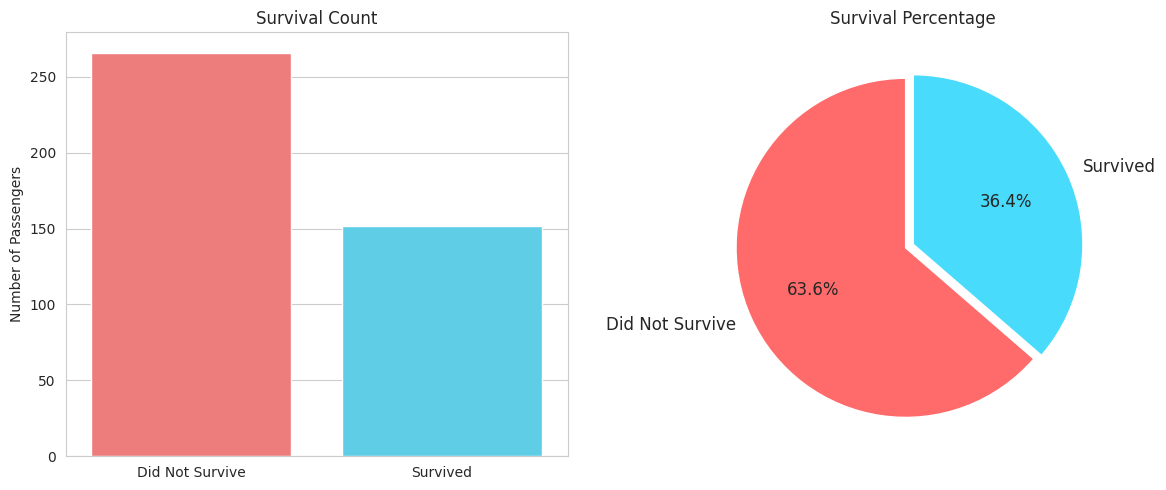

<ipython-input-5-93617429fff5>:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_survival = df.groupby('BookingGroup')['Survived'].mean() * 100
<ipython-input-5-93617429fff5>:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='BookingGroup', y='Survived', data=df, ci=None,
<ipython-input-5-93617429fff5>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BookingGroup', y='Survived', data=df, ci=None,



Survival rate by passenger ID group:
BookingGroup
Group 1 (892-1000)     37.6
Group 2 (1001-1100)    38.0
Group 3 (1101-1200)    33.0
Group 4 (1201-1309)    36.7
Name: Survived, dtype: float64


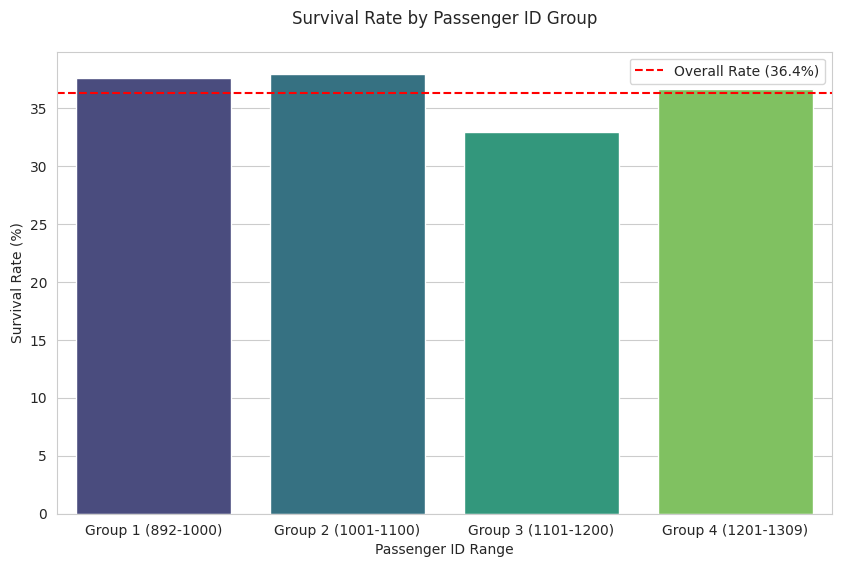

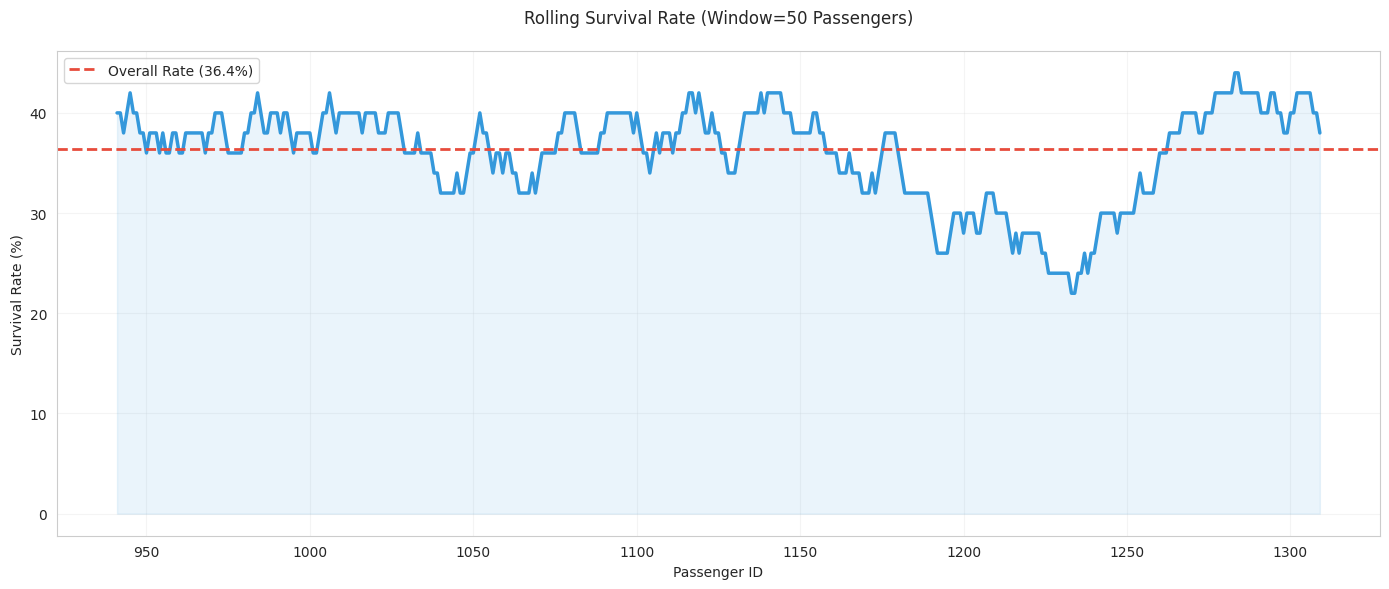

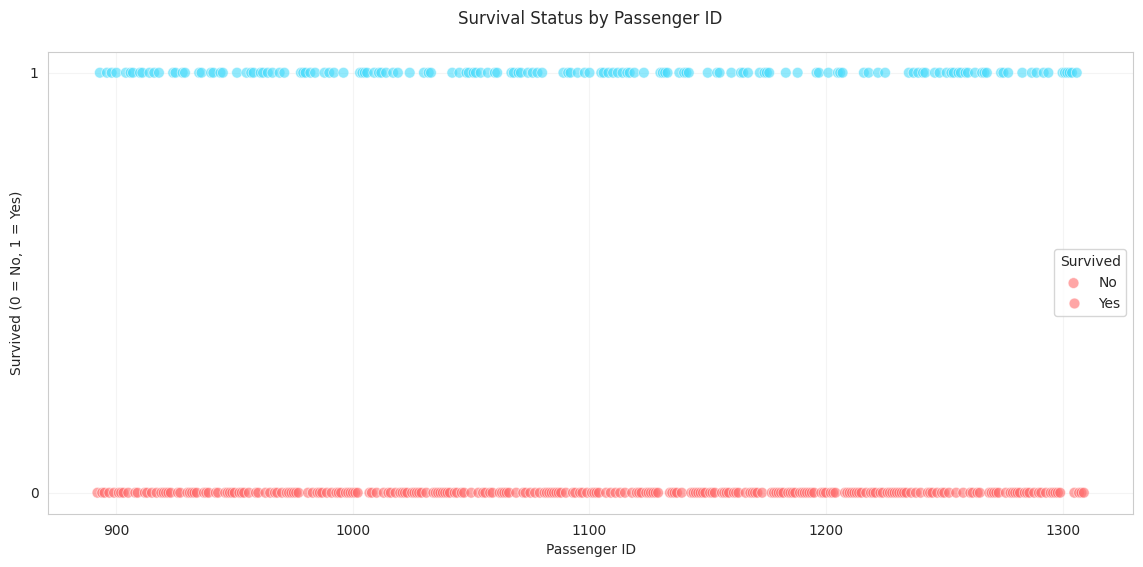


Additional Statistics:
First Passenger ID: 892
Last Passenger ID: 1309
Median Passenger ID: 1100.5
Survival rate for first 100 passengers: 37.6%
Survival rate for last 100 passengers: 36.4%


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
df = pd.read_csv('/content/gender_submission.csv')

# Data Cleaning and Preparation
# Convert PassengerId to numeric
df['PassengerId'] = pd.to_numeric(df['PassengerId'])

# Ensure Survived is numeric (0/1) for calculations
df['Survived'] = pd.to_numeric(df['Survived'])

# Create Booking Groups based on Passenger ID ranges
df['BookingGroup'] = pd.cut(df['PassengerId'],
                           bins=[890, 1000, 1100, 1200, 1310],
                           labels=['Group 1 (892-1000)',
                                   'Group 2 (1001-1100)',
                                   'Group 3 (1101-1200)',
                                   'Group 4 (1201-1309)'])

# 1. Overall Survival Analysis
overall_survival = df['Survived'].mean() * 100
survival_counts = df['Survived'].value_counts()

print(f"Total passengers: {len(df)}")
print(f"Survived: {survival_counts[1]} ({overall_survival:.1f}%)")
print(f"Did not survive: {survival_counts[0]} ({100-overall_survival:.1f}%)\n")

# Visualization 1: Survival Distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Survived', data=df, palette=['#ff6b6b', '#48dbfb'])
plt.title('Survival Count')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.xlabel('')
plt.ylabel('Number of Passengers')

plt.subplot(1, 2, 2)
plt.pie(survival_counts, labels=['Did Not Survive', 'Survived'],
        autopct='%1.1f%%', colors=['#ff6b6b', '#48dbfb'],
        startangle=90, explode=(0.05, 0), textprops={'fontsize': 12})
plt.title('Survival Percentage')
plt.tight_layout()
plt.show()

# 2. Survival by Passenger ID Groups
group_survival = df.groupby('BookingGroup')['Survived'].mean() * 100

print("\nSurvival rate by passenger ID group:")
print(group_survival.round(1))

plt.figure(figsize=(10, 6))
sns.barplot(x='BookingGroup', y='Survived', data=df, ci=None,
            palette='viridis', estimator=lambda x: sum(x)/len(x)*100)
plt.title('Survival Rate by Passenger ID Group', pad=20)
plt.ylabel('Survival Rate (%)')
plt.xlabel('Passenger ID Range')
plt.axhline(y=overall_survival, color='red', linestyle='--',
            label=f'Overall Rate ({overall_survival:.1f}%)')
plt.legend()
plt.show()

# 3. Rolling Survival Rate Analysis
window_size = 50
df_sorted = df.sort_values('PassengerId')
df_sorted['RollingSurvival'] = df_sorted['Survived'].rolling(window=window_size).mean() * 100

plt.figure(figsize=(14, 6))
plt.plot(df_sorted['PassengerId'], df_sorted['RollingSurvival'],
         color='#3498db', linewidth=2.5)
plt.fill_between(df_sorted['PassengerId'], df_sorted['RollingSurvival'],
                 color='#3498db', alpha=0.1)
plt.axhline(y=overall_survival, color='#e74c3c', linestyle='--',
            linewidth=2, label=f'Overall Rate ({overall_survival:.1f}%)')
plt.title(f'Rolling Survival Rate (Window={window_size} Passengers)', pad=20)
plt.xlabel('Passenger ID')
plt.ylabel('Survival Rate (%)')
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

# 4. Survival Rate by Passenger ID (Scatter Plot)
plt.figure(figsize=(14, 6))
sns.scatterplot(x='PassengerId', y='Survived', data=df,
                hue='Survived', palette=['#ff6b6b', '#48dbfb'],
                alpha=0.6, s=60)
plt.title('Survival Status by Passenger ID', pad=20)
plt.xlabel('Passenger ID')
plt.ylabel('Survived (0 = No, 1 = Yes)')
plt.yticks([0, 1])
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.grid(True, alpha=0.2)
plt.show()

# Additional Statistics
print("\nAdditional Statistics:")
print(f"First Passenger ID: {df['PassengerId'].min()}")
print(f"Last Passenger ID: {df['PassengerId'].max()}")
print(f"Median Passenger ID: {df['PassengerId'].median()}")
print(f"Survival rate for first 100 passengers: {df[df['PassengerId'] <= 1000]['Survived'].mean()*100:.1f}%")
print(f"Survival rate for last 100 passengers: {df[df['PassengerId'] >= 1200]['Survived'].mean()*100:.1f}%")